# Decision Tree

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmerpenguins dataset into a pandas DataFrame object
df = pd.read_csv("seeds.csv")

In [11]:
df.dropna(inplace = True)
df.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [28]:
penguin

[1, 2, 3]

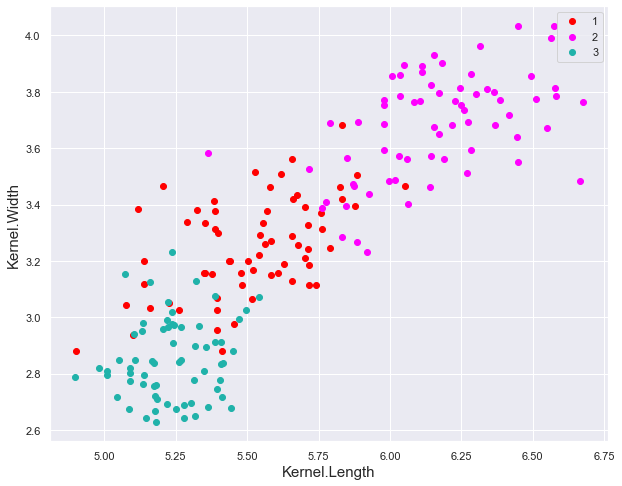

In [30]:
penguin = df.Type.unique().tolist()
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for Type, color in zip(penguin, colors):
    temp_df = df[df.Type == Type]
    ax.scatter(temp_df['Kernel.Length'],
               temp_df['Kernel.Width'],
               c = color,
               label = Type, 
               )
    
ax.set_xlabel("Kernel.Length", fontsize = 15)
ax.set_ylabel("Kernel.Width", fontsize = 15)
ax.legend()
plt.show()

In [31]:
X = df[["Kernel.Length","Kernel.Width"]].to_numpy()
y = df["Type"].to_numpy()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [33]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- x_0 <= 5.83
|   |--- x_1 <= 3.01
|   |   |--- x_1 <= 2.86
|   |   |   |--- class: 3
|   |   |--- x_1 >  2.86
|   |   |   |--- x_0 <= 5.12
|   |   |   |   |--- class: 1
|   |   |   |--- x_0 >  5.12
|   |   |   |   |--- x_0 <= 5.38
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- x_0 >  5.38
|   |   |   |   |   |--- x_0 <= 5.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_0 >  5.42
|   |   |   |   |   |   |--- class: 3
|   |--- x_1 >  3.01
|   |   |--- x_1 <= 3.14
|   |   |   |--- x_1 <= 3.12
|   |   |   |   |--- x_1 <= 3.09
|   |   |   |   |   |--- x_1 <= 3.07
|   |   |   |   |   |   |--- x_0 <= 5.19
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_0 >  5.19
|   |   |   |   |   |   |   |--- x_0 <= 5.24
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- x_0 >  5.24
|   |   |   |   |   |   |   |   |--- x_0 <= 5.44
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- x_0 >  

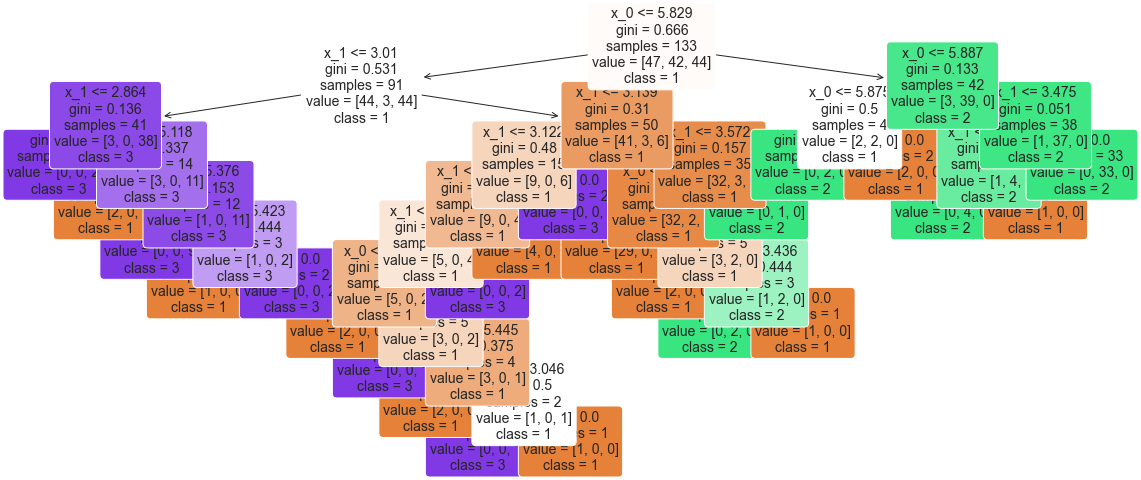

In [34]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["1", "2","3"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

The figure above depicts a graph theoretic tree that is used to make predictions. Suppose you would like to make a prediction on a given feature vector $x = [x_0, x_1]^T$. To do this, follow these steps:

Start at the root node (depth 0, at the top). If $x_1 \le 5.83$, then you then move down to the root's left child node (depth 1, left), otherwise move down to the root's right child node (depth 1, right). Repeat the process (illustrated in 2) of moving to successive child nodes according to satifying the boolean condition specified at each parent node until you reach a leaf node (a node with no child nodes). The predicted class of this leaf node will be the predicted class of our feature vector $x = [x_0, x_1]^T$.

That's it! We can visualize the decision regions generated by our trained decision tree by running the following code cell.

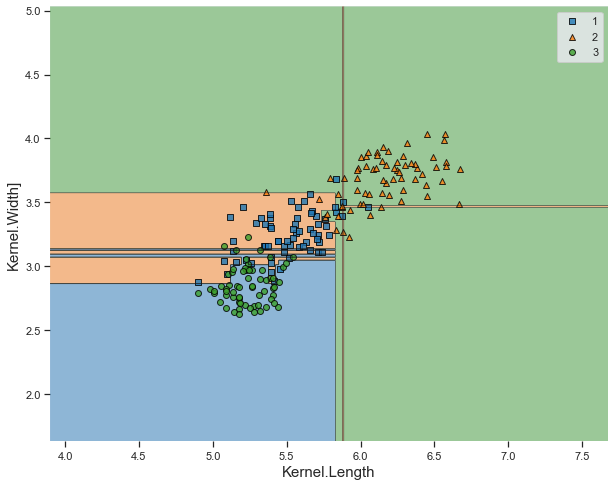

In [35]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
# we should mention that y in the plot_decision_regions must be integer
plt.xlabel("Kernel.Length", fontsize = 15)
plt.ylabel("Kernel.Width]", fontsize = 15)
plt.legend()
plt.grid()
plt.show()


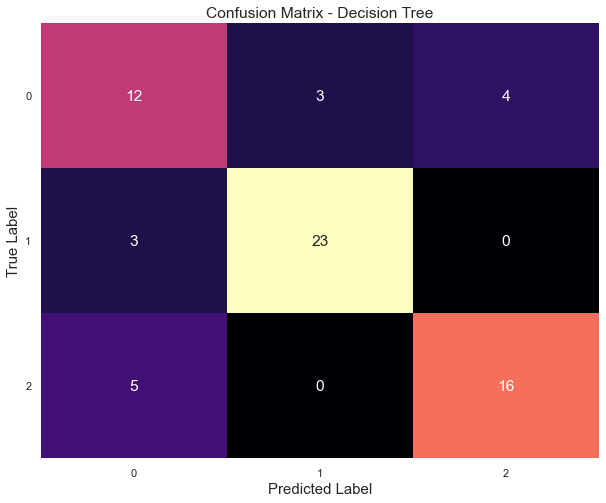

In [36]:
#predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["0", "1","2"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["0", "1","2"], rotation=0)
plt.show()


In [37]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.60      0.63      0.62        19
           2       0.88      0.88      0.88        26
           3       0.80      0.76      0.78        21

    accuracy                           0.77        66
   macro avg       0.76      0.76      0.76        66
weighted avg       0.78      0.77      0.77        66



# Regression Trees

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [40]:
X, y = load_diabetes(return_X_y = True)

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

reg1 = DecisionTreeRegressor(max_depth=1, random_state = 12)
reg1.fit(X_train, y_train)
y_pred = reg1.predict(X_test)
print(f"MSE reg1: {mean_squared_error(y_test, y_pred)} \n")


reg2 = DecisionTreeRegressor(max_depth=20, random_state = 12)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)
print(f"MSE reg2: {mean_squared_error(y_test, y_pred)} \n")

MSE reg1: 0.35666959797911874 

MSE reg2: 0.6515151515151515 



In [42]:
reg3 = DecisionTreeRegressor(max_depth=5, random_state = 12)
reg3.fit(X_train, y_train)
y_pred = reg3.predict(X_test)
print(f"MSE reg3: {mean_squared_error(y_test, y_pred)} \n")


reg4 = DecisionTreeRegressor(max_depth=10, random_state = 12)
reg4.fit(X_train, y_train)
y_pred = reg4.predict(X_test)
print(f"MSE reg4: {mean_squared_error(y_test, y_pred)} \n")

MSE reg3: 0.5355367736320118 

MSE reg4: 0.6515151515151515 



In [43]:
for i in range(2,8):
    
    
    reg = DecisionTreeRegressor(max_depth=i, random_state = 12)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    print(f"when max_depth is {i},MSE reg: {mean_squared_error(y_test, y_pred)} \n")


when max_depth is 2,MSE reg: 0.289029223405857 

when max_depth is 3,MSE reg: 0.3942214053752515 

when max_depth is 4,MSE reg: 0.3929852325578822 

when max_depth is 5,MSE reg: 0.5355367736320118 

when max_depth is 6,MSE reg: 0.6043537414965986 

when max_depth is 7,MSE reg: 0.614006734006734 



In [45]:
y.shape
y[:10]

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310.])

We find there are total 442 samples, and the value of y is big, considering which, the 4053 MSE is acceptable.